In [93]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

id: Identifier for the patient

N_Days: Number of days of follow-up

Drug: Type of drug administered

Age: Age of the patient

Sex: Gender of the patient

Ascites: Presence of ascites

Hepatomegaly: Presence of hepatomegaly

Spiders: Presence of spider angiomata

Edema: Presence of edema

Bilirubin: Bilirubin level

Cholesterol: Cholesterol level

Albumin: Albumin level

Copper: Copper level

Alk_Phos: Alkaline phosphatase level

SGOT: Aspartate aminotransferase level

Tryglicerides: Triglycerides level

Platelets: Platelet count

Prothrombin: Prothrombin time

Stage: Stage of the disease

Status: Outcome status (target variable)

In [94]:
# Load the datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [95]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1084.0,D-penicillamine,17664.0,F,N,N,N,N,0.5,273.0,3.65,23.0,648.0,52.70,59.0,316.0,10.0,2.0,C
1,1,790.0,D-penicillamine,23376.0,F,N,Y,N,N,8.4,NaN,3.15,161.0,1790.0,181.35,NaN,298.0,13.6,4.0,D
2,2,1367.0,NaN,13149.0,F,NaN,NaN,NaN,N,0.6,NaN,3.03,NaN,NaN,NaN,NaN,402.0,11.4,1.0,C
3,3,2721.0,Placebo,17809.0,F,N,Y,N,N,0.9,NaN,3.80,18.0,1868.0,97.65,NaN,327.0,9.5,2.0,C
4,4,989.0,NaN,12369.0,F,NaN,NaN,NaN,N,1.8,NaN,3.58,NaN,NaN,NaN,NaN,244.0,10.4,3.0,C


In [96]:
# stats for both numerical and categorical features
train.describe(include= 'all')

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,15000.000000,15000.000000,8392,15000.000000,15000,8397,8393,8394,15000,15000.000000,6591.000000,15000.000000,8301.000000,8390.000000,8388.000000,6542.000000,14465.000000,14972.000000,15000.000000,15000
unique,NaN,NaN,3,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,D-penicillamine,NaN,F,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,4603,NaN,14410,7976,4669,6665,13885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10143
mean,7499.500000,1975.936133,NaN,19335.121000,NaN,NaN,NaN,NaN,NaN,1.856540,324.362464,3.529608,74.059511,1629.502491,105.941519,110.773311,254.624286,10.628560,3.020200,NaN
std,4330.271354,1329.160103,NaN,3770.307853,NaN,NaN,NaN,NaN,NaN,2.808997,173.485624,0.376463,75.157884,1783.319145,52.530975,49.619668,93.805348,0.735234,0.875505,NaN
min,0.000000,28.000000,NaN,124.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,7.300000,6.300000,33.000000,0.400000,9.000000,1.000000,NaN
25%,3749.750000,1095.000000,NaN,16688.000000,NaN,NaN,NaN,NaN,NaN,0.600000,239.000000,3.290000,31.000000,714.000000,70.000000,80.000000,183.000000,10.100000,2.000000,NaN
50%,7499.500000,1786.000000,NaN,19544.000000,NaN,NaN,NaN,NaN,NaN,0.900000,279.000000,3.580000,52.000000,1071.000000,97.650000,99.000000,251.000000,10.600000,3.000000,NaN
75%,11249.250000,2644.000000,NaN,22546.000000,NaN,NaN,NaN,NaN,NaN,1.800000,360.000000,3.770000,84.000000,1664.000000,130.200000,133.000000,312.000000,11.000000,4.000000,NaN


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8392 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8397 non-null   object 
 6   Hepatomegaly   8393 non-null   object 
 7   Spiders        8394 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6591 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8301 non-null   float64
 13  Alk_Phos       8390 non-null   float64
 14  SGOT           8388 non-null   float64
 15  Tryglicerides  6542 non-null   float64
 16  Platelets      14465 non-null  float64
 17  Prothrombin    14972 non-null  float64
 18  Stage 

In [98]:
# check for missing values

missing_values = train.isnull().sum()
missing_values

id                  0
N_Days              0
Drug             6608
Age                 0
Sex                 0
Ascites          6603
Hepatomegaly     6607
Spiders          6606
Edema               0
Bilirubin           0
Cholesterol      8409
Albumin             0
Copper           6699
Alk_Phos         6610
SGOT             6612
Tryglicerides    8458
Platelets         535
Prothrombin        28
Stage               0
Status              0
dtype: int64

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5631 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5633 non-null   object 
 6   Hepatomegaly   5627 non-null   object 
 7   Spiders        5627 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4334 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5559 non-null   float64
 13  Alk_Phos       5624 non-null   float64
 14  SGOT           5623 non-null   float64
 15  Tryglicerides  4299 non-null   float64
 16  Platelets      9611 non-null   float64
 17  Prothrombin    9986 non-null   float64
 18  Stage  

In [100]:
test.isnull().sum()

id                  0
N_Days              0
Drug             4369
Age                 0
Sex                 0
Ascites          4367
Hepatomegaly     4373
Spiders          4373
Edema               0
Bilirubin           0
Cholesterol      5666
Albumin             0
Copper           4441
Alk_Phos         4376
SGOT             4377
Tryglicerides    5701
Platelets         389
Prothrombin        14
Stage               0
dtype: int64

cannot just drop missing values


In [101]:
train['Status'].value_counts()

Status
C     10143
D      4501
CL      356
Name: count, dtype: int64

**Inference Derived:**

1. Drug, Ascites, hepatomegaly, Spiders, Cholestrol, Copper, Alk_Phos, SGOT, Tryglicerides and (maybe) Platelets colums have significant num of missing values

2. Drug, Sex, Ascites, Hepatomegaly, Spiders, and Edema are categorical columns

3. N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, and Prothrombin are numerical columns

4. target variable Status has three categories: C (10143), CL (356), and D (4501)

## EDA

Text(0, 0.5, 'Count')

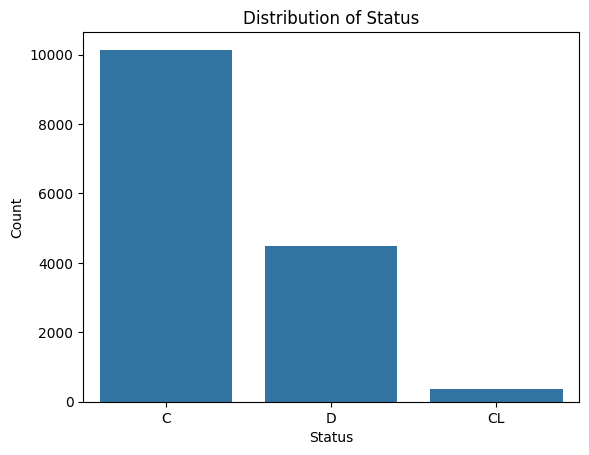

In [102]:
# plot distribution of target variable

sns.countplot(x = 'Status', data= train)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')

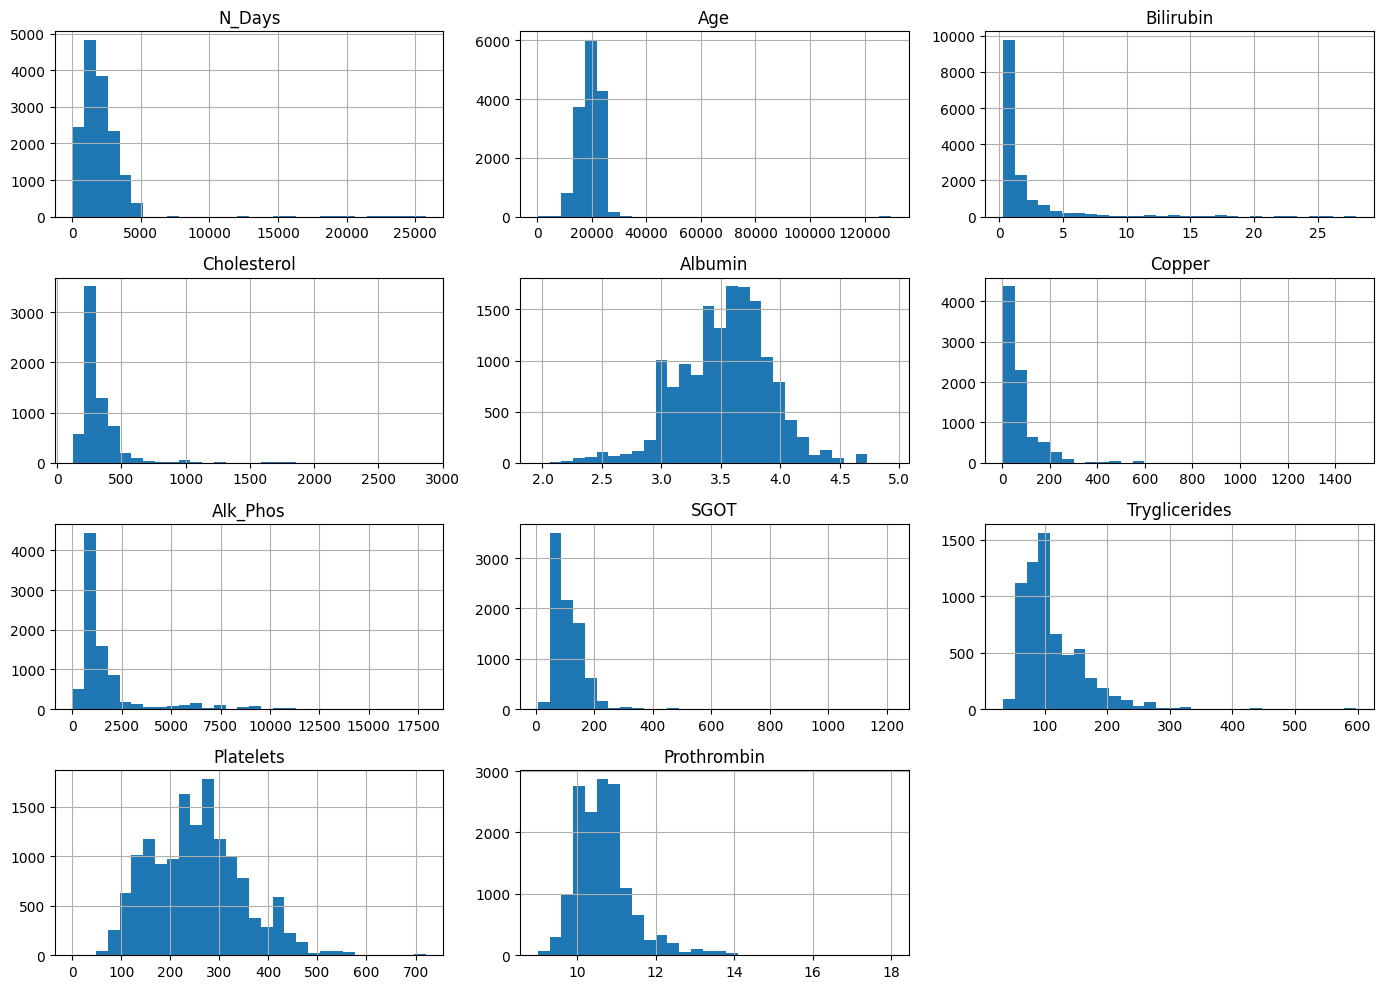

In [103]:
# Distribution of numerical features

numerical_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

train[numerical_features].hist(figsize=(14, 10), bins=30)
plt.tight_layout()

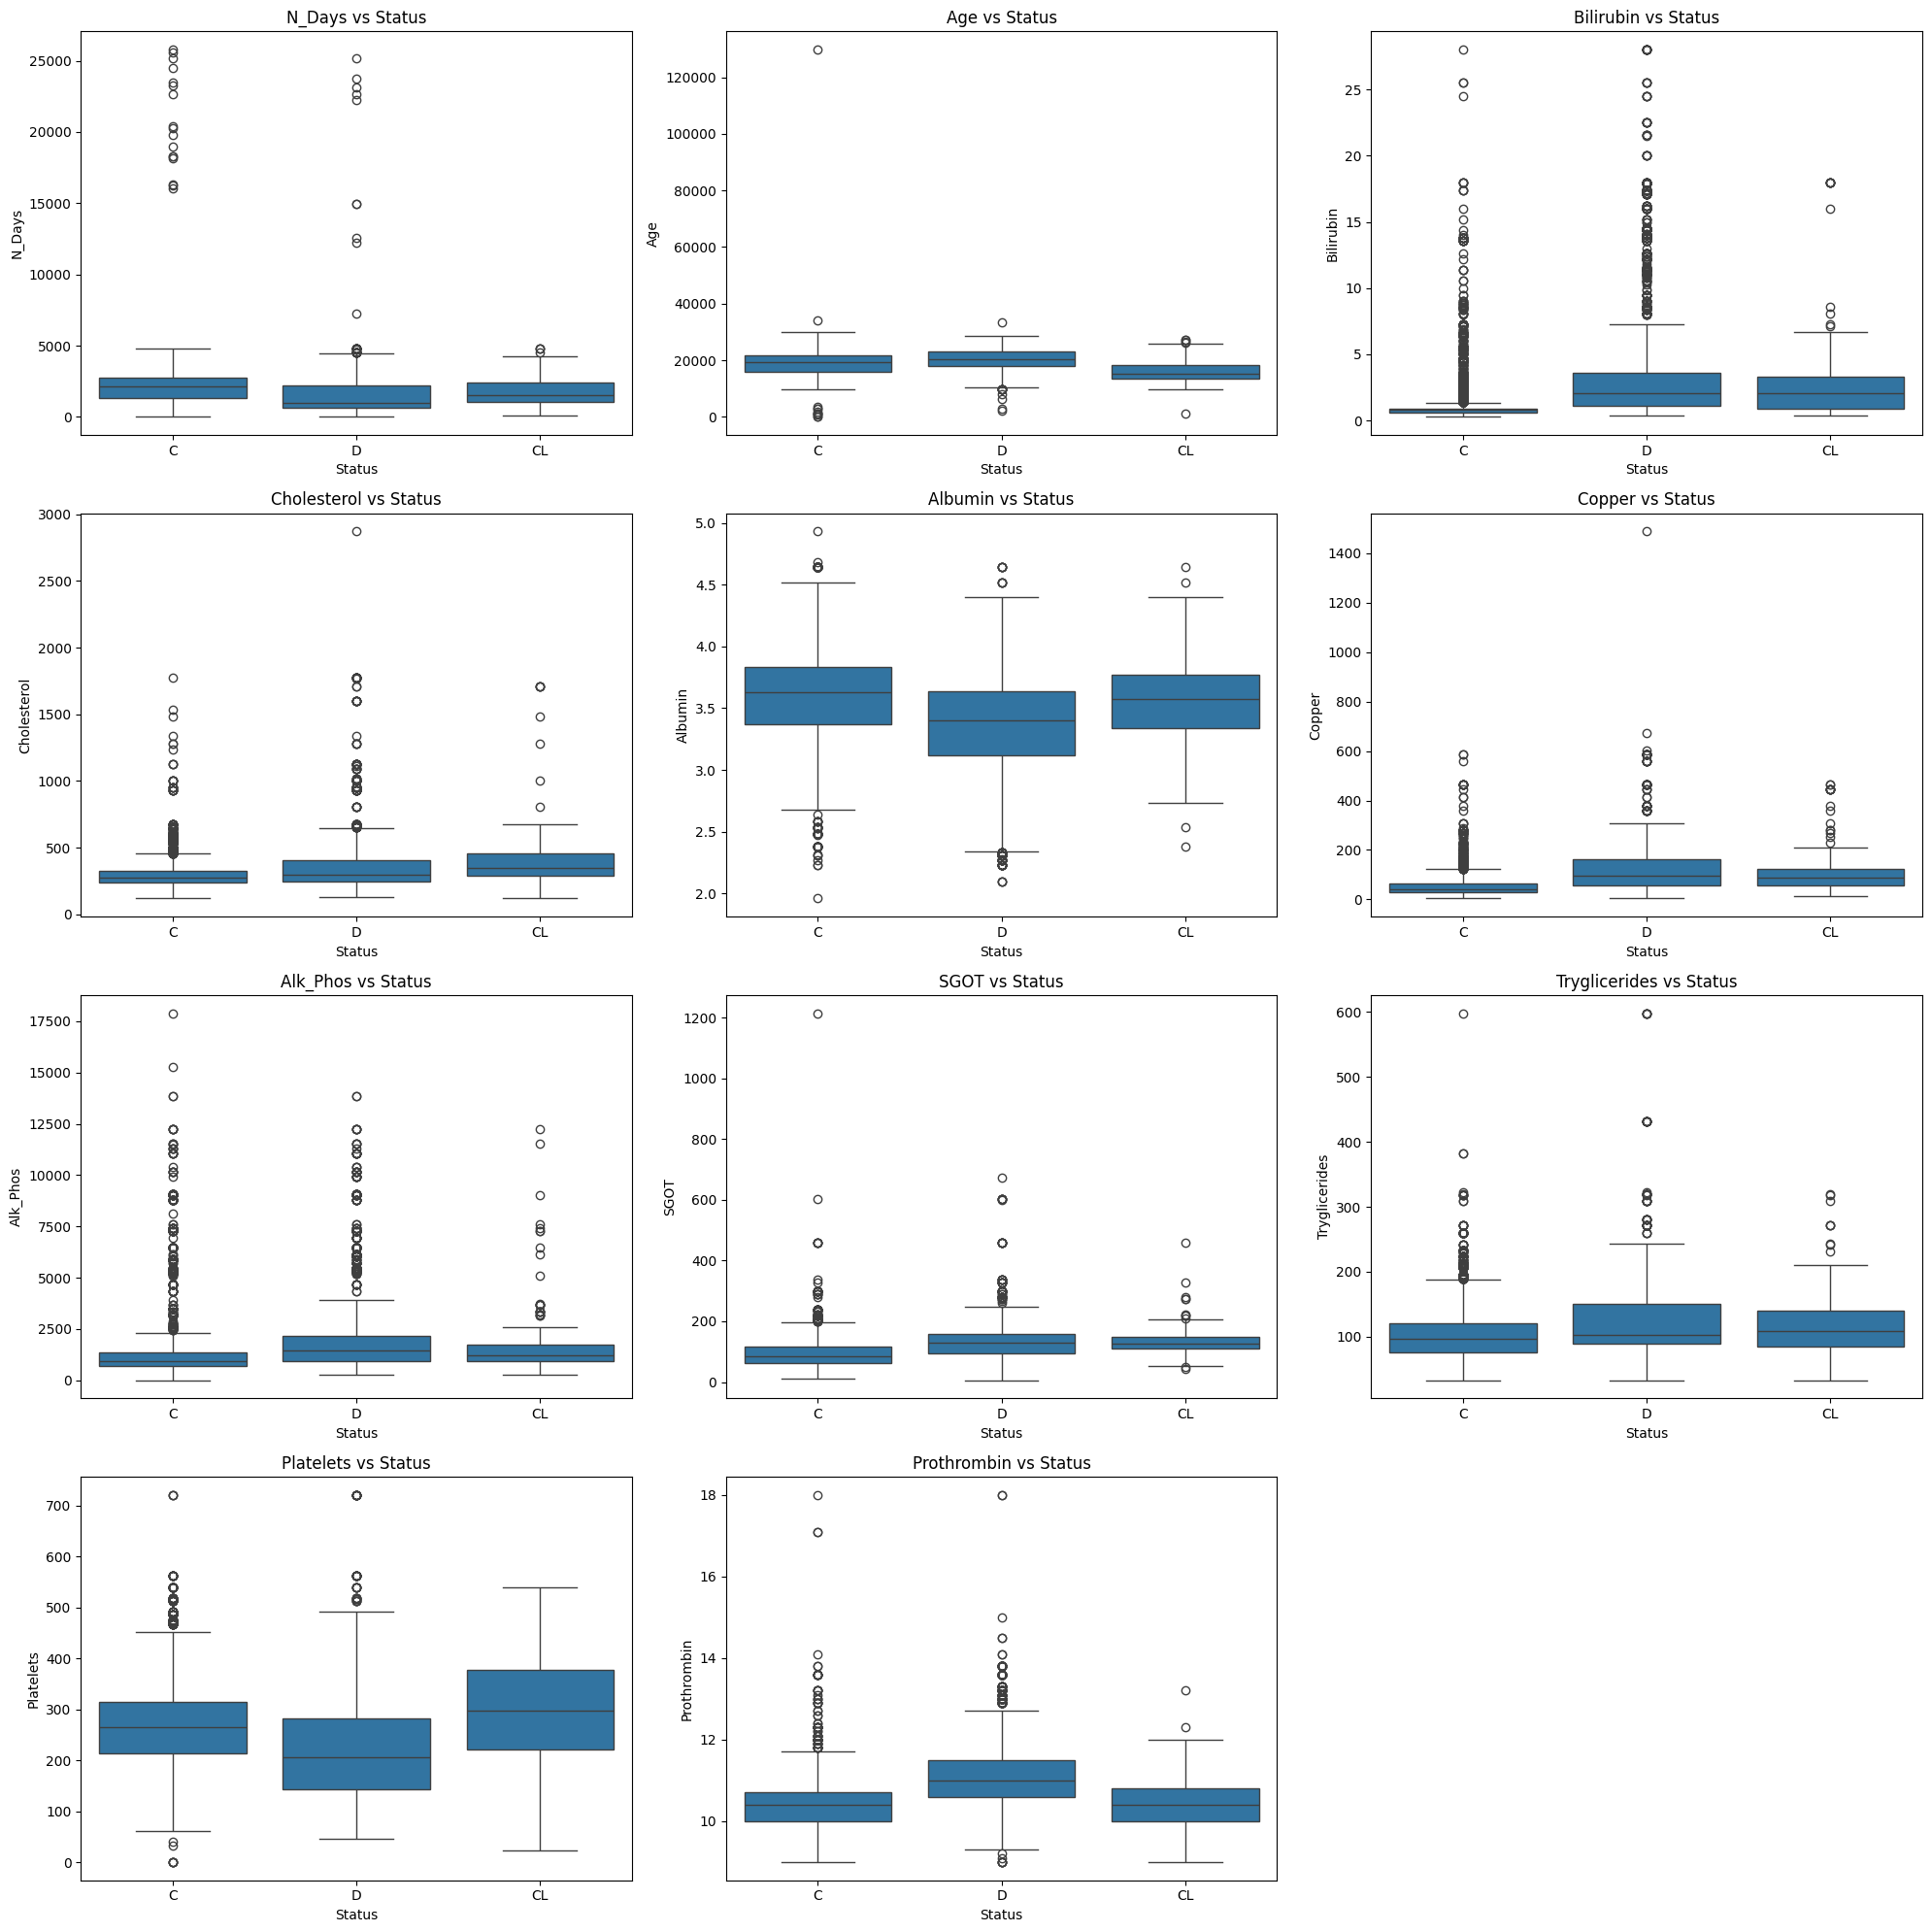

In [104]:
# Relationship between Features and Target Variables
# using box plot (to find outliers too)

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Status', y=feature, data=train)
    plt.title(f'{feature} vs Status')
plt.tight_layout()

In [105]:
y = train['Status']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = train.drop('Status', axis=1)

In [106]:
num = X.select_dtypes(include=['int64', 'float64']).columns
col = X.select_dtypes(include=['object']).columns

In [107]:
col

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [108]:
# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


In [109]:
# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [110]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, col)])

In [111]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
# Train a Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train_preprocessed, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [115]:

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

Cross-validation accuracy scores: [0.83       0.83708333 0.83166667 0.82916667 0.82583333]
Mean cross-validation accuracy: 0.8307499999999999


In [116]:
# Predict on the training set and evaluate
y_train_pred = model.predict(X_train_preprocessed)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8133
           1       0.00      0.00      0.00       289
           2       0.81      0.65      0.72      3578

    accuracy                           0.83     12000
   macro avg       0.55      0.53      0.54     12000
weighted avg       0.81      0.83      0.82     12000

[[7641    0  492]
 [ 219    0   70]
 [1236    0 2342]]


C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [117]:
X_test_preprocessed = preprocessor.transform(X_test)

In [118]:
# Predict probabilities for each class
y_test_pred_proba = model.predict_proba(X_test_preprocessed)

In [119]:
y_test_pred_proba

array([[9.63416057e-05, 1.79512862e-01, 8.20390796e-01],
       [9.66060809e-01, 1.24719369e-02, 2.14672541e-02],
       [6.02534285e-01, 8.51957298e-03, 3.88946142e-01],
       ...,
       [4.09094897e-01, 6.66659514e-03, 5.84238508e-01],
       [9.08662251e-01, 1.90881721e-02, 7.22495765e-02],
       [9.24392186e-01, 1.12321672e-02, 6.43756468e-02]])

In [120]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2157.0,Placebo,21281.0,F,N,N,N,N,0.7,298.0,3.64,27.0,637.0,106.95,68.0,201.0,10.6,1.0
1,15001,348.0,D-penicillamine,19817.0,F,N,Y,Y,N,2.3,175.0,3.06,225.0,944.0,120.90,75.0,102.0,12.3,3.0
2,15002,131.0,D-penicillamine,16154.0,F,N,Y,Y,N,6.5,950.0,3.40,88.0,2374.0,193.00,133.0,354.0,11.8,4.0
3,15003,1141.0,NaN,21532.0,F,NaN,NaN,NaN,N,0.6,NaN,4.19,NaN,NaN,NaN,NaN,181.0,10.9,2.0
4,15004,1260.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.9,NaN,3.81,NaN,NaN,NaN,NaN,371.0,10.5,4.0


In [121]:
X_test_preprocessed = preprocessor.transform(test)

In [122]:

# Predict probabilities for each class
test_pred_proba = model.predict_proba(X_test_preprocessed)

In [124]:
# Prepare the submission file

submission_df = pd.DataFrame(test_pred_proba, columns=model.classes_)
submission_df.insert(0, 'id', test['id'])
submission_df.to_csv('submission_LG.csv', index=False)

In [125]:
submission_df.head()

,id,0,1,2
0,15000,0.955557,0.004166,0.040277
1,15001,0.041064,0.011146,0.947789
2,15002,0.010296,0.111999,0.877705
3,15003,0.859596,0.006909,0.133495
4,15004,0.773351,0.017790,0.208859
